In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

from sklearn.decomposition import PCA

In [73]:
df = pd.read_csv('../data/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
print(list(df.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [4]:
# Choosing data with numeric values 0-100 of players' characteristics
# Dropping 5 out of 6 gk_something because they are better at goalkeeping_whatever
# Keeping gk_speed because no goalkeeping_speed availiable

data_pca = df[['attacking_crossing', 'attacking_finishing', 
           'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
           'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
           'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
           'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
           'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
           'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
           'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
           'goalkeeping_reflexes']]

In [5]:
data_pca.isna().sum()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeep

In [6]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 34 columns):
attacking_crossing            18278 non-null int64
attacking_finishing           18278 non-null int64
attacking_heading_accuracy    18278 non-null int64
attacking_short_passing       18278 non-null int64
attacking_volleys             18278 non-null int64
skill_dribbling               18278 non-null int64
skill_curve                   18278 non-null int64
skill_fk_accuracy             18278 non-null int64
skill_long_passing            18278 non-null int64
skill_ball_control            18278 non-null int64
movement_acceleration         18278 non-null int64
movement_sprint_speed         18278 non-null int64
movement_agility              18278 non-null int64
movement_reactions            18278 non-null int64
movement_balance              18278 non-null int64
power_shot_power              18278 non-null int64
power_jumping                 18278 non-null int64
power_stamina           

In [7]:
def pca_from_df(df, components):
    
    pca = PCA(n_components=components) 
    principalComponents = pca.fit_transform(np.array(df))

    principal_array = pd.DataFrame(data = principalComponents)
    
                  

    variance = pd.DataFrame()
    pcomps = []
    total_var = []

    i = 1
    var = 0

    for elem in range(len(pca.explained_variance_ratio_)):
        pcomps.append(i)
        var = var + pca.explained_variance_ratio_[elem]
        total_var.append(var)
        i += 1

    variance['pc'] = pcomps
    variance['var_accum'] = total_var

    return variance

In [8]:
pca_from_df(data_pca, 15)

,pc,var_accum
0,1,0.567274
1,2,0.751944
2,3,0.813058
3,4,0.857253
4,5,0.883524
5,6,0.895061
6,7,0.905300
7,8,0.913519
8,9,0.921186
9,10,0.928320


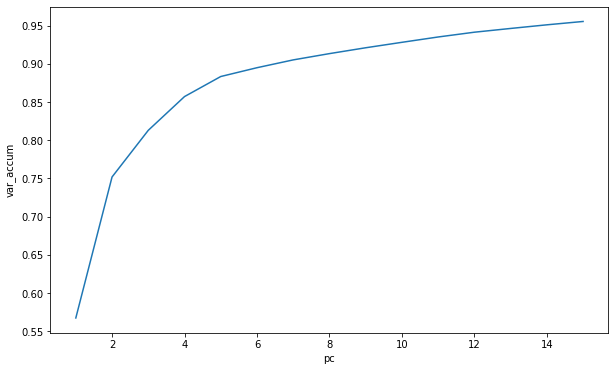

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=pca_from_df(data_pca, 15), x='pc', y='var_accum', markers=True)
plt.show()

In [10]:
# I'll go with 10 components, which explain more than 90% of the variance

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(np.array(data_pca))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-131.438683,-95.899558,51.480713,-9.174814,-4.865195,0.463864,-11.729164,-20.036704,-4.743961,-6.957540
1,-119.708237,-90.271904,43.964447,27.318947,-39.497933,-2.965711,-4.848200,-21.920822,-3.334339,-3.367746
2,-116.640454,-100.171178,38.922122,-16.196469,-4.987633,3.755814,-6.907650,-17.579236,-1.104690,1.750669
3,180.183523,-18.674847,86.722536,-26.300352,-54.610491,7.376339,-17.814906,-7.872057,-5.128267,-5.595998
4,-115.783564,-91.716757,32.988922,-12.725271,-9.267630,9.198816,-11.159524,-9.460400,-4.790712,-0.991825


## Clustering

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(principalDf)
kmeans.labels_


array([3, 3, 3, ..., 0, 0, 0])

In [12]:
# Cluster centers

res = kmeans.__dict__
print(res['cluster_centers_'])

[[ 7.39820004e+00  4.71874955e+01 -1.58617257e+01  2.33151579e+00
  -4.40428720e-02  3.80291766e-02 -4.63675116e-01 -1.29227345e+00
  -8.13841993e-01  4.35965881e-01]
 [-5.51198008e+01  1.36817291e+01  1.79576029e+01 -6.60852665e+00
   1.41886503e+00 -6.15960751e-01  1.35709432e+00  2.31474666e+00
   1.34569862e+00 -8.68846422e-01]
 [ 1.86561469e+02 -1.50876627e+01  2.62384382e+01 -6.15348113e+00
  -2.51595453e+00  1.92059665e-01  5.58168220e-01  1.68111464e-01
   4.49697013e-01  2.10364880e-01]
 [-2.10313794e+01 -4.72449782e+01 -1.17038498e+01  6.08185672e+00
  -3.71360692e-01  4.55450635e-01 -1.01859325e+00 -1.04060741e+00
  -6.73076872e-01  3.38082748e-01]]


In [13]:
df['cluster'] = list(kmeans.labels_)

In [14]:
df[['short_name','cluster']].head()

,short_name,cluster
0,L. Messi,3
1,Cristiano Ronaldo,3
2,Neymar Jr,3
3,J. Oblak,2
4,E. Hazard,3


In [15]:
cluster = []
size = []

for i in range(4):
    cluster.append(i)
    size.append(len(df.loc[df['cluster']==i]))
    
    
cl_size_df = pd.DataFrame()
cl_size_df['cluster'] = cluster
cl_size_df['size'] = size

cl_size_df

,cluster,size
0,0,5016
1,1,5322
2,2,2036
3,3,5904


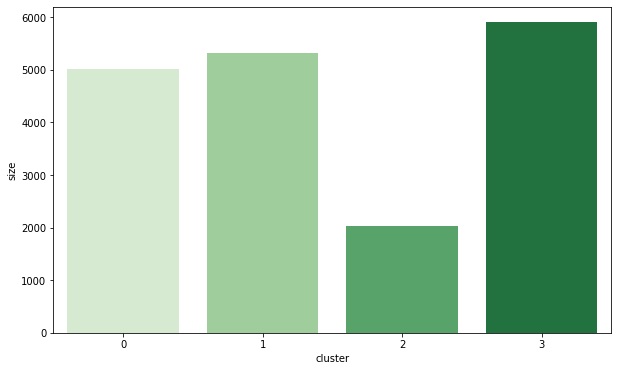

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=cl_size_df, x='cluster', y='size', palette='Greens')
plt.show()

In [59]:
df.loc[df['cluster']==0][['short_name', 'player_positions', 'cluster']]['player_positions'].value_counts()

# CLuster 0: These are mostly Defenders

CB             2118
LB              326
RB              308
CM              232
CB, RB          217
               ... 
CM, RWB           1
RB, LB, LWB       1
CB, LB, LM        1
CAM, LW           1
LM, LB, RM        1
Name: player_positions, Length: 207, dtype: int64

In [60]:
df.loc[df['cluster']==0][['short_name', 'player_positions', 'cluster', 
                          'overall']].sort_values(by='overall', ascending=False).head(20)

# CLuster 0: These are mostly Defenders

,short_name,player_positions,cluster,overall
11,K. Koulibaly,CB,0,89
57,M. Škriniar,CB,0,86
77,N. Süle,CB,0,85
83,J. Giménez,CB,0,85
90,K. Manolas,CB,0,85
126,S. de Vrij,CB,0,84
133,Sokratis,CB,0,84
156,Felipe,CB,0,84
158,A. Romagnoli,CB,0,83
165,J. Tah,CB,0,83


In [61]:
df.loc[df['cluster']==1][['short_name', 'player_positions', 'cluster']]['player_positions'].value_counts()

# Cluster 1: These are mostly Midfielders

CM, CDM        592
CDM, CM        568
CM             438
LB             343
RB             278
              ... 
ST, RM, LM       1
CB, RWB, RB      1
RB, CB, CDM      1
LW, CAM, RM      1
LWB, LB, RB      1
Name: player_positions, Length: 449, dtype: int64

In [62]:
df.loc[df['cluster']==1][['short_name', 'player_positions', 'cluster', 
                          'overall']].sort_values(by='overall', ascending=False).head(20)

# Cluster 1: These are mostly Midfielders and technic defenders. ALso some forwards (Salah, Suarez)

,short_name,player_positions,cluster,overall
5,K. De Bruyne,"CAM, CM",1,91
8,L. Modrić,CM,1,90
9,M. Salah,"RW, ST",1,90
7,V. van Dijk,CB,1,90
12,H. Kane,ST,1,89
15,N. Kanté,"CDM, CM",1,89
16,G. Chiellini,CB,1,89
18,Sergio Ramos,CB,1,89
19,L. Suárez,ST,1,89
21,Sergio Busquets,"CDM, CM",1,89


In [63]:
df.loc[df['cluster']==2][['short_name', 'player_positions', 'cluster']]['player_positions'].value_counts()

# CLuster 2: These are all Goalkeepers

GK    2036
Name: player_positions, dtype: int64

In [64]:
df.loc[df['cluster']==2][['short_name', 'player_positions', 'cluster', 
                          'overall']].sort_values(by='overall', ascending=False).head(20)

,short_name,player_positions,cluster,overall
3,J. Oblak,GK,2,91
6,M. ter Stegen,GK,2,90
13,Alisson,GK,2,89
14,De Gea,GK,2,89
25,Ederson,GK,2,88
28,T. Courtois,GK,2,88
30,S. Handanovič,GK,2,88
31,M. Neuer,GK,2,88
32,H. Lloris,GK,2,88
53,K. Navas,GK,2,87


In [65]:
df.loc[df['cluster']==3][['short_name', 'player_positions', 'cluster']]['player_positions'].value_counts()

# CLuster 3: These are mostly Forwards

ST             1769
CAM             236
LM              209
RM              196
RM, LM          190
               ... 
CM, CDM, RM       1
RM, CF, CM        1
LM, CF, ST        1
ST, CAM, CM       1
LM, RWB           1
Name: player_positions, Length: 335, dtype: int64

In [24]:
df.loc[df['cluster']==3][['short_name', 'player_positions', 'cluster', 
                          'overall']].sort_values(by='overall', ascending=False).head(20)

# CLuster 3: These are mostly Forwards

,short_name,player_positions,cluster,overall
0,L. Messi,"RW, CF, ST",3,94
1,Cristiano Ronaldo,"ST, LW",3,93
2,Neymar Jr,"LW, CAM",3,92
4,E. Hazard,"LW, CF",3,91
10,K. Mbappé,"ST, RW",3,89
17,S. Agüero,ST,3,89
20,R. Lewandowski,ST,3,89
26,R. Sterling,"RW, LW",3,88
38,P. Aubameyang,"ST, LM",3,88
43,H. Son,"CF, LM",3,87


In [66]:
# We translate clusters to 4 groups of players: goalkeepers, defenders, midfielders or forwards

def get_cluster(x):
    if x == 0:
        return 'Defender'
    elif x == 1:
        return 'Midfielder'
    elif x == 2:
        return 'Goalkeeper'
    elif x == 3:
        return 'Forward'
    
    
df['cluster_name'] = df['cluster'].apply(get_cluster)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,cluster,cluster_name
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,3,Forward
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,3,Forward
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,3,Forward
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Goalkeeper
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,3,Forward


In [67]:
# Summarizing: Midfielders cluster ended as a cluster containing too different players. 
# This method to group players seems to be not as accurate as it would be desirable